<a href="https://colab.research.google.com/github/zaephaer/AutoML/blob/main/ml_project_1_heartfailure_lazypredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Calling required libraries
import numpy as np
import pandas as pd

In [ ]:
# Loading dataset directly from Google Drive
url = 'https://drive.google.com/file/d/1lYqh0DOoQfLjYmFlL8efXv6aZeBuBKOr/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


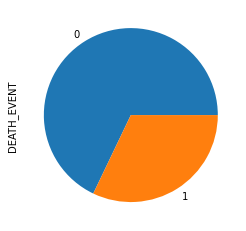

In [ ]:
# Creating bar like this will aloow us to see, wether data is inbalance or not, 
# which might resulted of overfitting (where data will be train more on larger amount of classification)
# df['DEATH_EVENT'].hist()

# Using pie chart we can see that both Target if almost balance
df['DEATH_EVENT'].value_counts().plot.pie()

In [ ]:
# Using resample method to balance datase
from sklearn.utils import resample

# Temporary created divided class dataset
safe = df[df["DEATH_EVENT"] == 0]
unsafe = df[df["DEATH_EVENT"] == 1]

# Created temp df with both class, with same amount of data
upsampled = resample(unsafe, replace=True, n_samples=len(safe), random_state=33)

# Concat
upsampled = pd.concat([safe, upsampled])

# Check new balance class
upsampled["DEATH_EVENT"].value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

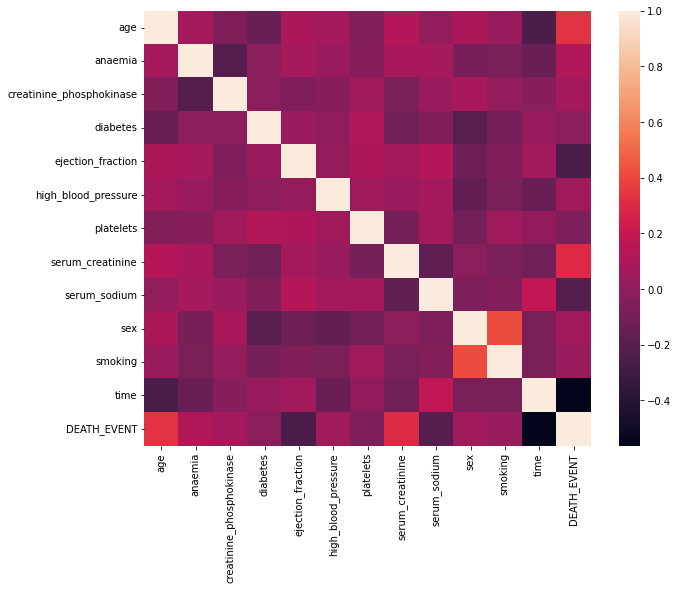

In [ ]:
# Examine correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(upsampled.corr())

In [ ]:
# Correlation of Target with Feature - Ranked
upsampled.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
age                         0.331503
serum_creatinine            0.297579
anaemia                     0.113571
creatinine_phosphokinase    0.076373
sex                         0.057955
high_blood_pressure         0.056721
smoking                     0.026046
diabetes                   -0.025074
platelets                  -0.065179
serum_sodium               -0.209523
ejection_fraction          -0.250227
time                       -0.562484
Name: DEATH_EVENT, dtype: float64

In [ ]:
# Splitting dataset
X = upsampled.drop(["DEATH_EVENT"],axis=1)
y = upsampled["DEATH_EVENT"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

print(f'X Training Shape:',X_train.shape)
print(f'y Training Shape:',y_train.shape)
print('***************************')
print(f'X Testing Shape y:',X_test.shape)
print(f'y Testing Shape y:',y_test.shape)

X Training Shape: (324, 12)
y Training Shape: (324,)
***************************
X Testing Shape y: (82, 12)
y Testing Shape y: (82,)


In [ ]:
pip install lazypredict

In [ ]:
# Using Lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:01<00:00, 24.35it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.91               0.90     0.90      0.91   
RandomForestClassifier             0.91               0.89     0.89      0.91   
XGBClassifier                      0.90               0.87     0.87      0.90   
LabelPropagation                   0.89               0.86     0.86      0.89   
BaggingClassifier                  0.89               0.86     0.86      0.89   
LabelSpreading                     0.89               0.86     0.86      0.89   
AdaBoostClassifier                 0.88               0.85     0.85      0.87   
DecisionTreeClassifier             0.88               0.85     0.85      0.87   
ExtraTreeClassifier                0.87               0.83     0.83      0.86   
LGBMClassifier                     0.87               0.82     0.82      0.86   
SVC                         

In [ ]:
# Take the highest model and makes prediction
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
X, y = make_classification(n_features=12, random_state=0)
xlf = ExtraTreesClassifier(n_estimators=100, random_state=0)
xlf.fit(X, y)

# evaluate the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(xlf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.910 (0.087)


In [ ]:
# make a single prediction
#row = [[55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6]]       # Row[1] - Death = 1
row = [[50.0,0,196,	0,45,0,395000.0,1.6,136,1,1,285]]    # Row[296] - Death = 0
	
yhat = xlf.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [ ]:
# make a single prediction
input = (55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271)  # Row[296] - Death = 0
#55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271	
input_array = np.asarray(input)
input_reshaped = input_array.reshape(1,-1)

predict = xlf.predict(input_reshaped)
print('Predicted Class: %d' % predict[0])

Predicted Class: 1
